## 1. environment setup

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.set_option('display.max_rows', 50) 

## 2. load data

In [102]:
df = pd.read_csv('./Data/movies.csv')

## 3. check for missing/invalid data

In [106]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"Column {col} is missing: {pct_missing * 100:.4f}%")

Column name is missing: 0.0000%
Column rating is missing: 0.0000%
Column genre is missing: 0.0000%
Column year is missing: 0.0000%
Column released is missing: 0.0000%
Column score is missing: 0.0000%
Column votes is missing: 0.0000%
Column director is missing: 0.0000%
Column writer is missing: 0.0000%
Column star is missing: 0.0000%
Column country is missing: 0.0000%
Column budget is missing: 0.0000%
Column gross is missing: 0.0000%
Column company is missing: 0.0000%
Column runtime is missing: 0.0000%


In [104]:
# drop invalid data (nulls)
df = df.dropna()

In [105]:
# 4. review data types and formatting
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [107]:
# formatting
df = df.copy()

df.loc[:,'budget'] = df['budget'].astype('int64')
df.loc[:,'gross'] = df['gross'].astype('int64')
df.loc[:,'votes'] = df['gross'].astype('int64')

In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,46998772,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,58853106,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,538375067,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,83453539,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,39846344,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [109]:
# custom method for problematic data
def coalesce_release_year(released, coalesce):
    splitted = released.split()
    length = len(splitted)
    
    if length != 5:
        return coalesce
    else:
        return splitted[2]

In [110]:
df['YearReleased'] = df['released'].apply(lambda x: coalesce_release_year(x, 1982))
df['YearReleased'].astype(str)

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: YearReleased, Length: 5421, dtype: object

In [111]:
# reordering
df.sort_values(by="gross", inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,2847246203,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,2797501328,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,2201647264,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,2069521700,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,2048359754,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,5073,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,1982
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,2970,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,2554,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,1982
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2270,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


## 5. correlation to gross

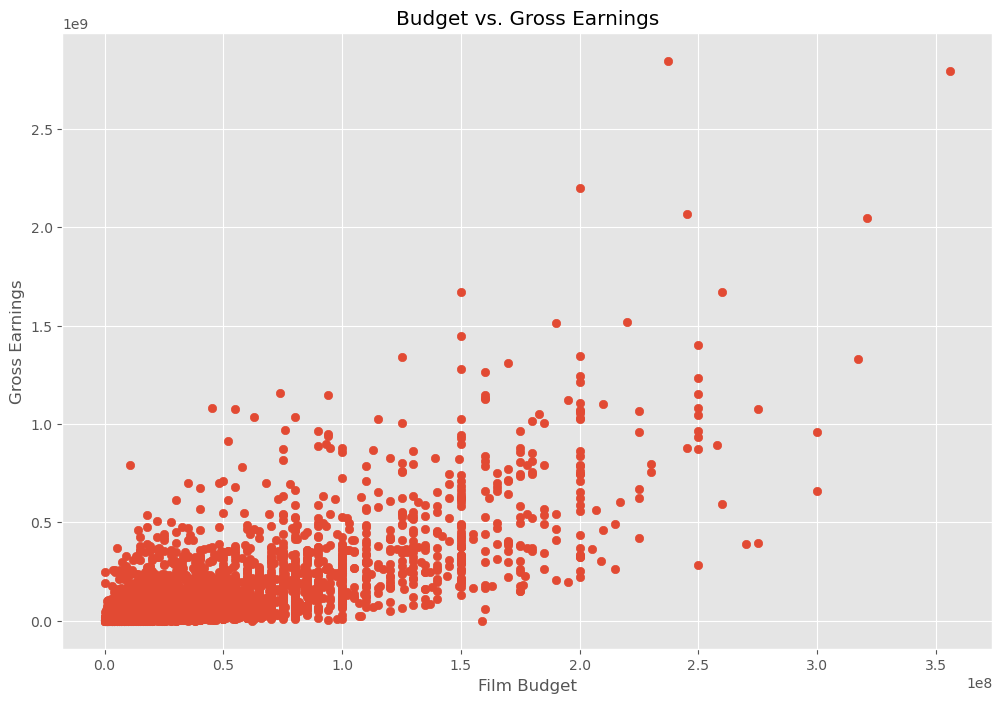

In [112]:
# hypothesis: 1) bigger budget, 2) bigger company
# build scatterplot of budget vs. gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

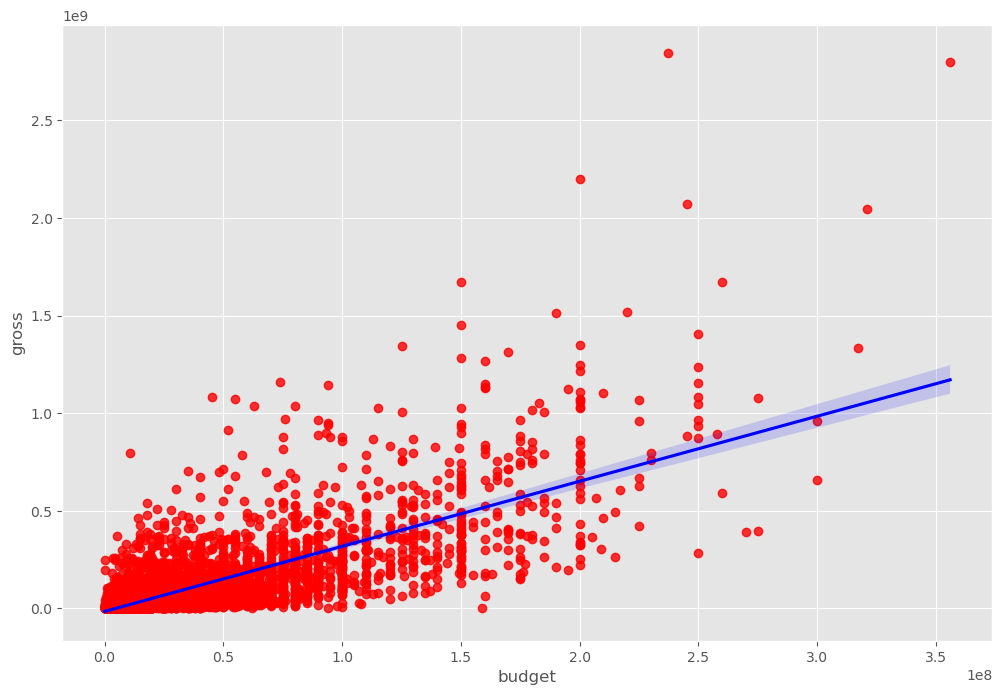

In [113]:
# regression plot budget vs. gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [114]:
# correlation
df.corr() # method='pearson' or 'kendall' or 'spearman'

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.274321,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.222556,0.072001,0.222556,0.414068
votes,0.274321,0.222556,1.000000,0.740247,1.000000,0.275796
budget,0.327722,0.072001,0.740247,1.000000,0.740247,0.318695
gross,0.274321,0.222556,1.000000,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.275796,0.318695,0.275796,1.000000


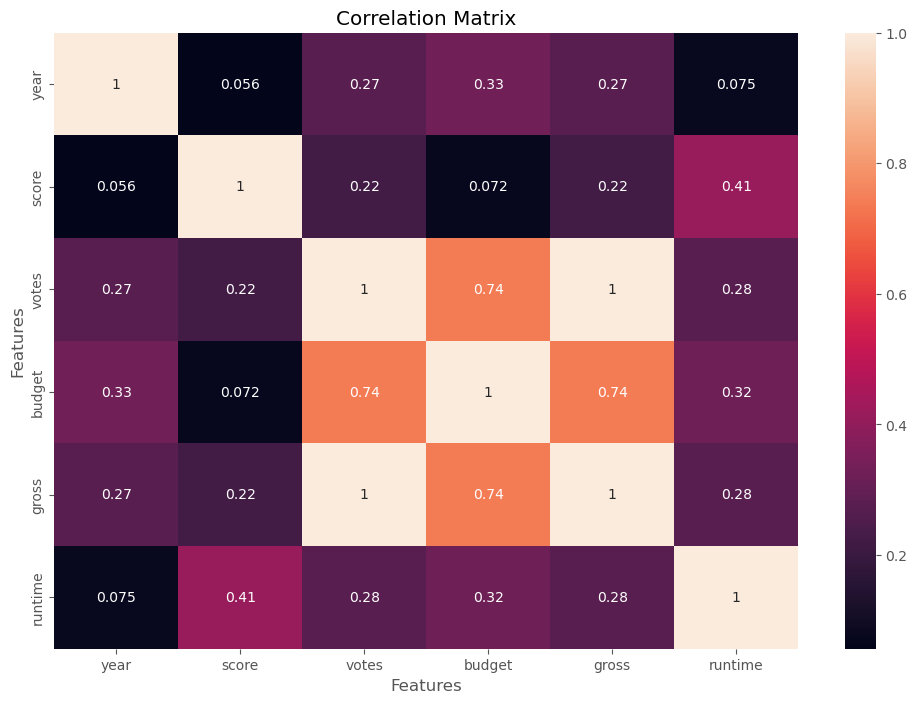

In [115]:
# high correlation between budget and gross

matrix = df.corr()
sns.heatmap(matrix, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [116]:
# correlation: company vs. gross

dfc = df

In [117]:
# categorize
for c in dfc.columns:
    if (dfc[c].dtype == 'object'):
        dfc[c] = dfc[c].astype('category')
        dfc[c] = dfc[c].cat.codes

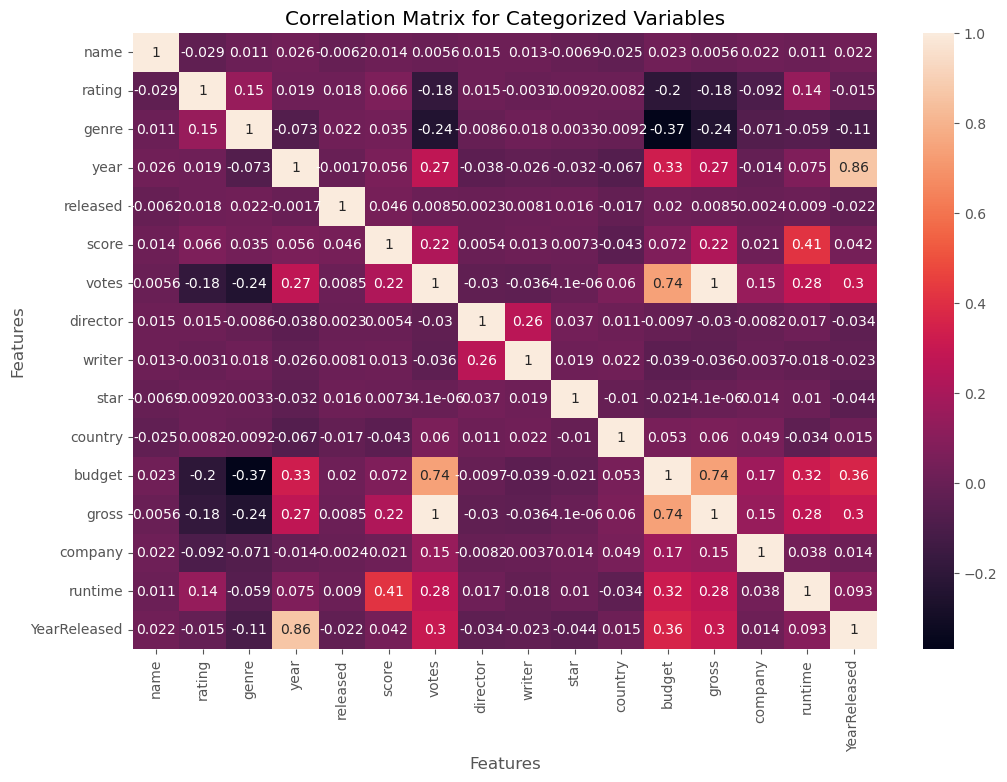

In [118]:
# plot again for categorized variables vs. gross


matrix = dfc.corr()
sns.heatmap(matrix, annot=True)

plt.title('Correlation Matrix for Categorized Variables')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [119]:
dfc.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.005639,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.022181
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,-0.181906,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.014917
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.244101,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.106182
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.274321,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.864877
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.008501,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.021828
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.222556,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.042002
votes,0.005639,-0.181906,-0.244101,0.274321,0.008501,0.222556,1.000000,-0.029560,-0.035885,-0.000004,0.060078,0.740247,1.000000,0.149553,0.275796,0.300268
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.029560,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.033931
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.035885,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023200
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.000004,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.043897


In [120]:
# unstacking
pairs = dfc.corr().unstack()
pairs_sorted = pairs.sort_values()
pairs_sorted

genre         budget         -0.368523
budget        genre          -0.368523
genre         votes          -0.244101
votes         genre          -0.244101
gross         genre          -0.244101
                                ...   
budget        budget          1.000000
gross         votes           1.000000
              gross           1.000000
director      director        1.000000
YearReleased  YearReleased    1.000000
Length: 256, dtype: float64

In [121]:
high_correlation = pairs_sorted[(pairs_sorted > 0.5) & (pairs_sorted < 1.0)]

In [122]:
high_correlation

budget        gross           0.740247
gross         budget          0.740247
votes         budget          0.740247
budget        votes           0.740247
YearReleased  year            0.864877
year          YearReleased    0.864877
dtype: float64